# 연습문제
1. 네이버 오픈 API 를 활용하여 네이버지식인 "전주여행" 과 "경주여행"을 검색
   - pip install python-dotenv
2. 폼사태깅 백업
3. 명사를 추출
4. 빈도분석 (DataFrame)
5. 빈도시각화 (워드클라우드, nltk.Text)
6. Word2Vec

# 1. 네이버 open API 를 활용하여 검색 추출

- 검색어, no, title, link, description + title + '' + description

sentences [['전주', '곳', '추천'], ['추억', '체험', '감성', '추억', '여행', '테마', '박물관', '시간', '전북', '전북', '투어', '패스', '통합', '이용권', '전북', '핫', '여행지', '체험', '카페', '이용', '추가', '전주', '여행', '필수', '날'], ['여행'], ['여행', '사람과', '호텔', '가격', '정', '음', '박', '여행', '얼마', '정도', '맛집', '카페', '추천', '전주', '여행', '계획', '중이', '네', '옥', '마을', '근처'], ['전주', '박', '일', '여행', '관련', '질문'], ['전주', '여행', '계획', '정말', '선택', '전주', '옥', '마을', '자연', '경관', '음식', '동네', '정말', '시간', '수', '거', '우선', '옥', '마을', '근처', '수', '장소'], ['중', '여학생', '친구', '전주', '여행'], ['중', '살', '여학생', '친한친구', '둘이서', '전주', '여행', '가기', '어디', '가야', '저희', '일본', '애니', '오타쿠', '곳', '제발'], ['부', '모닝', '모시', '전주', '여행'], ['부모님', '모시', '여행', '명소', '식당', '추천', '전주', '옥', '마을', '완산구', '덕진구', '또한', '추억', '장소'], ['박', '일', '전주', '여행'], ['이번', '주', '토', '월', '박', '일', '여자친구', '여행', '여행', '경로', '좀', '토요일', '비', '실내', '데이트', '곳도', '숙소', '옥', '마을', '근처', '토', '옥', '마을', '구경', '후'], ['전주', '박', '일', '여행'], ['저녁', '전주천', '산책길', '옥', '마을', '근처', '야경', '것', '혹시', '일정', '관심', '테마', '사진

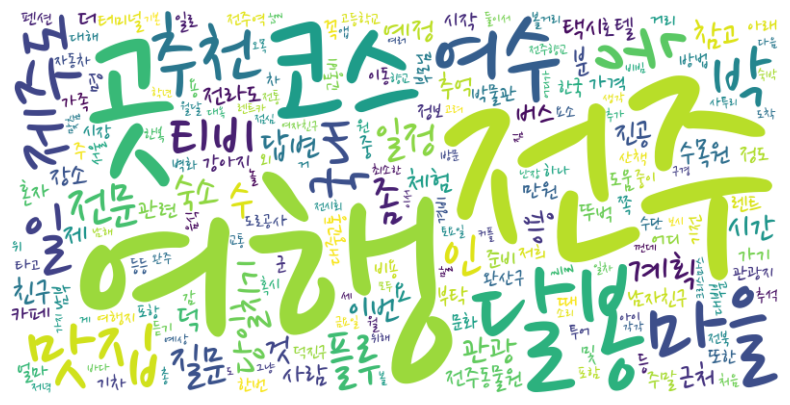

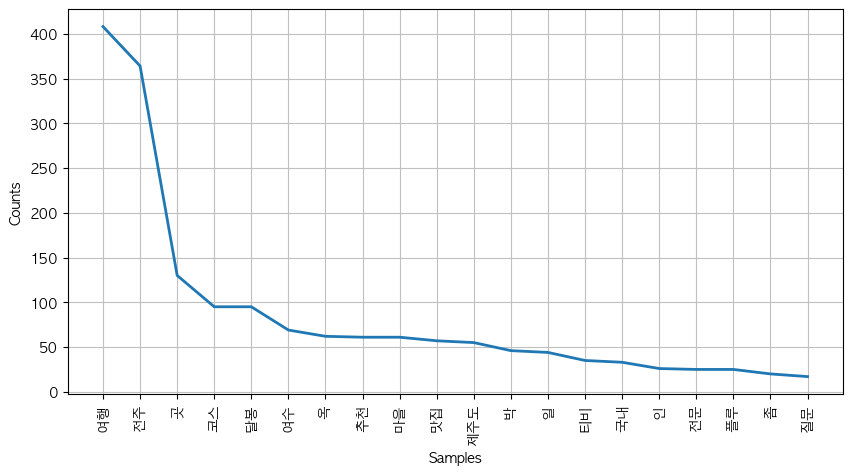

[('여행', 0.9962837100028992), ('코스', 0.9962358474731445), ('것', 0.9961342215538025), ('국내', 0.9961318969726562), ('당일치기', 0.9959438443183899), ('곳', 0.995518684387207), ('전라도', 0.9953919053077698), ('계획', 0.9953001141548157), ('티비', 0.995274543762207), ('맛집', 0.995238721370697)]


In [102]:
import os
import sys
import urllib.request
import json
import re
from dotenv import load_dotenv

from konlpy.tag import Okt
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import Text
from gensim.models import Word2Vec
import platform

from html import unescape


load_dotenv()
client_id = os.getenv('Client_ID')
client_secret = os.getenv('Client_Secret')

encText = urllib.parse.quote("전주여행")

url = f"https://openapi.naver.com/v1/search/kin.json?query={encText}&display=99" 
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()


if(rescode==200):
    response_body = response.read()
else:
    print("Error Code:" + rescode)
    sys.exit()

data = json.loads(response_body.decode('utf-8'))

okt = Okt()
texts = []
sentences = []

for item in data['items']:
    for field in ['title', 'description']:
        # HTML 태그, 특수문자 제거
        text = re.sub('<.*?>', '', unescape(item[field]))
        texts.append(text)
        clean = re.sub('[^가-힣\s]', ' ', text)
        nouns = okt.nouns(clean)
        if nouns:
            sentences.append(nouns)
print("sentences",sentences)
# 2. 명사 추출
all_nouns = sum(sentences, [])
print("all_nouns",type(all_nouns),all_nouns[:20])

# 3. 빈도분석
nouns_series = pd.Series(all_nouns).sort_index(ascending=False)
freq = nouns_series.value_counts()
print(freq.head(20))

# 4. 워드클라우드
word_freq = freq.to_dict()
wordcloud = WordCloud(font_path='./data/NanumPenScript-Regular.ttf', background_color='white', width=800, height=400).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# nltk.Text plot
text_obj = Text(all_nouns)
plt.figure(figsize=(10, 5))

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux':
    plt.rc('font', family='Malgun Gothic') 

text_obj.plot(20)

# 5. Word2Vec
model = Word2Vec([all_nouns], vector_size=100, window=5, min_count=2, sg=1)
print(model.wv.most_similar('전주', topn=10))
